# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [37]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [38]:
sdf = pd.read_csv("./datasets/kodex_stock.csv")
bdf = pd.read_csv("./datasets/kodex_bond10y.csv")

In [39]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

In [40]:
sdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0


In [41]:
bdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25


In [42]:
sdf['pct_chg'] = sdf['close'].pct_change()
sdf.fillna(0, inplace=True)
sdf = sdf.rename(columns={'close': 'stock_close'})
sdf.head()

,dt,stock_close,high,low,open,volume,pct_chg
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0,0.000000
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0,0.000000
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0,-0.000600
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0,0.001402
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0,0.002600


In [43]:
bdf['pct_chg'] =bdf['close'].pct_change()
bdf.fillna(0, inplace=True)
bdf = bdf.rename(columns={'close': 'bond_close'})
bdf.head()

,dt,bond_close,high,low,open,volume,pct_chg
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50,0.000000
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00,0.003449
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50,0.000954
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50,0.001528
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25,-0.011236


In [44]:
r = sdf['pct_chg']
sdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
sdf['로그수익률']  = np.log( 1+r) 
sdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100
sdf

,dt,stock_close,high,low,open,volume,pct_chg,누적수익률,로그수익률,누적로그수익률
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0,0.000000,0.000000,0.000000,0.000000
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0,0.000000,0.000000,0.000000,0.000000
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0,-0.000600,-0.060048,-0.000601,-0.060066
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0,0.001402,0.080064,0.001401,0.080032
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0,0.002600,0.340272,0.002597,0.339695
...,...,...,...,...,...,...,...,...,...,...
1840,2019-07-17,71210.0,71220.0,71070.0,71080.0,344.0,0.002181,42.534027,0.002179,35.441057
1841,2019-07-18,71665.0,71665.0,71290.0,71290.0,1516.0,0.006390,43.444756,0.006369,36.077980
1842,2019-07-19,71770.0,71850.0,71670.0,71670.0,15083.0,0.001465,43.654924,0.001464,36.224388
1843,2019-07-22,71685.0,71755.0,71685.0,71740.0,1461.0,-0.001184,43.484788,-0.001185,36.105884


In [45]:
r = bdf['pct_chg']
bdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
bdf['로그수익률']  = np.log( 1+r) 
bdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100
bdf

,dt,bond_close,high,low,open,volume,pct_chg,누적수익률,로그수익률,누적로그수익률
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50,0.000000,0.000000,0.000000,0.000000
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00,0.003449,0.344866,0.003443,0.344273
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50,0.000954,0.440567,0.000953,0.439599
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50,0.001528,0.594032,0.001527,0.592275
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25,-0.011236,-0.536267,-0.011300,-0.537710
...,...,...,...,...,...,...,...,...,...,...
1840,2019-07-17,27225.0,27340.0,27130.0,27310.0,1886297.00,-0.008919,17.362291,-0.008959,16.009547
1841,2019-07-18,27165.0,27260.0,27065.0,27180.0,2290347.00,-0.002204,17.103641,-0.002206,15.788918
1842,2019-07-19,27545.0,27610.0,27315.0,27315.0,2532920.00,0.013989,18.741756,0.013892,17.178083
1843,2019-07-22,27535.0,27620.0,27435.0,27470.0,1797628.00,-0.000363,18.698647,-0.000363,17.141772


In [46]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

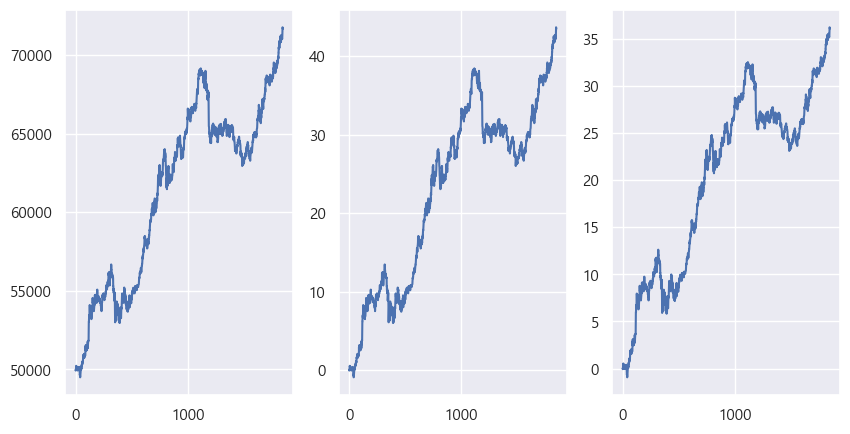

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.plot(sdf['stock_close'])

plt.subplot(1,3,2)
# (1+r).pct_change() -1
plt.plot( sdf['누적수익률'])

plt.subplot(1,3,3)
# np.log(1 + r)
plt.plot(  sdf['누적로그수익률'] )

plt.show()

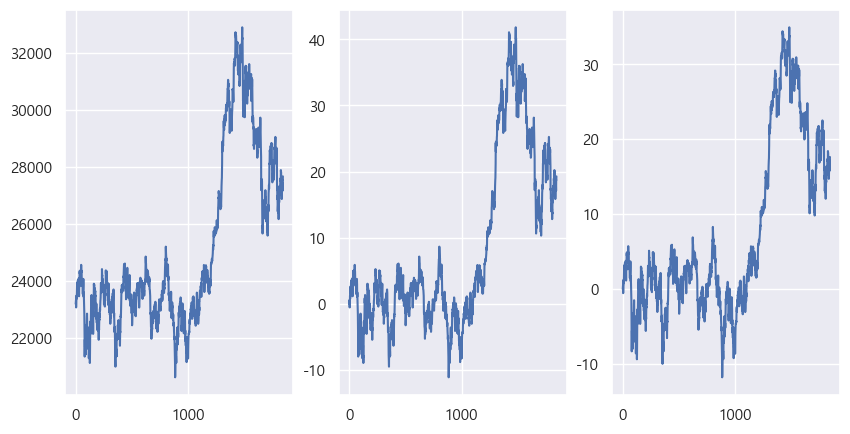

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.plot(bdf['bond_close'])

plt.subplot(1,3,2)
# (1+r).pct_change() -1
plt.plot( bdf['누적수익률'])

plt.subplot(1,3,3)
# np.log(1 + r)
plt.plot(  bdf['누적로그수익률'] )

plt.show()

In [50]:
close_sdf = sdf.iloc[:, [1]]
close_sdf.head()

,stock_close
0,49960.0
1,49960.0
2,49930.0
3,50000.0
4,50130.0


In [51]:
close_bdf = bdf.iloc[:, [1]]
close_bdf.head()

,bond_close
0,23197.4
1,23277.4
2,23299.6
3,23335.2
4,23073.0


In [52]:
merged_df = pd.concat([close_sdf,close_bdf], axis=1)

merged_df

,stock_close,bond_close
0,49960.0,23197.4
1,49960.0,23277.4
2,49930.0,23299.6
3,50000.0,23335.2
4,50130.0,23073.0
...,...,...
1840,71210.0,27225.0
1841,71665.0,27165.0
1842,71770.0,27545.0
1843,71685.0,27535.0


In [56]:
expected_return = np.log(1+ merged_df.pct_change())
expected_return.dropna(inplace=True, axis=0)
expected_return

,stock_close,bond_close
1,0.000000,0.003443
2,-0.000601,0.000953
3,0.001401,0.001527
4,0.002597,-0.011300
5,0.000997,0.005377
...,...,...
1840,0.002179,-0.008959
1841,0.006369,-0.002206
1842,0.001464,0.013892
1843,-0.001185,-0.000363


In [57]:
annual_ret = expected_return.mean()   * 252
annual_cov = expected_return.cov() * 252

port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = expected_return.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    #------------------- 수익률, 리스크(편차), 샤프지수 -----------------------
    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(np.round(weights,2)) 
    port_sharp.append(sharp) 
    
    
port_dic = {'Return': port_ret, 'Risk': port_risk, 'Sharp':port_sharp ,'Weight': port_weights} 
df = pd.DataFrame(port_dic) 
print(f'{stocks.values}')
df.head()

['stock_close' 'bond_close']


,Return,Risk,Sharp,Weight
0,0.047407,0.040516,1.170082,"[0.92, 0.08]"
1,0.038011,0.059924,0.634327,"[0.55, 0.45]"
2,0.045793,0.039785,1.151022,"[0.86, 0.14]"
3,0.026860,0.114388,0.234814,"[0.11, 0.89]"
4,0.033274,0.081680,0.407372,"[0.36, 0.64]"


In [58]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]['Sharp'].values[0]

# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] ['Risk'].values[0]
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] ['Return'].values[0]


#           Risk    Return
# 6274  0.223144  0.760134
#            Risk    Return
# 12088  0.173086  0.283057
#           Risk    Return
# 1667  0.306557  0.982149

print(f'Expected annual return: {return_max:.4f}')
print(f'Annual volatility: {risk_min:.4f}')
print(f'Sharpe Ratio: {sharp_max:.4f}')

Expected annual return: 0.0493
Annual volatility: 0.0398
Sharpe Ratio: 1.1710


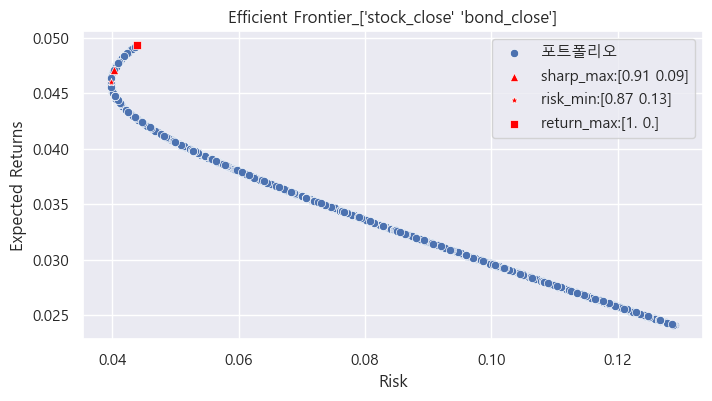

In [59]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]
# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] 
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='Risk', y='Return'                     , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='Risk', y='Return', marker="^", c='red', label=f"sharp_max:{sharp_max['Weight'].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Return', marker="*", c='red', label=f"risk_min:{risk_min['Weight'].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Return', marker="s", c='red', label=f"return_max:{return_max['Weight'].values[0]}")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 